In [1]:
import numpy as np
import pandas as pd
import csv
import pylab as pl
import seaborn as sns
import mpl_toolkits.basemap as bm

## Подготовим данные

In [2]:
df = pd.read_csv('dataset_rooms.csv', encoding='cp1251')
df.shape

(115779, 23)

In [3]:
df.head()

,type_of_accommodation,number_of_rooms,floor,floors,type_of_house,repair,combined_bathroom,shared_bathroom,ceiling_height,passenger_elevator,...,balcony,population,view_from_the_windows,price,total_area,living_area,kitchen_area,year_of_construction,till_metro,address
0,"Вторичка,4,12,12,Монолитный,Без ремонта,3,0,3....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Новостройка,1,3,15,Монолитный,Нет,0,1,0,1,1,1,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Вторичка,1,6,11,Монолитный,Без ремонта,1,0,3.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Вторичка,2,20,24,Панельный,Без ремонта,0,1,2.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Вторичка,1,9,11,Монолитный,Без ремонта,1,0,0,0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df['type_of_accommodation']
data = pd.unique(df)
data.shape

(17066,)

In [5]:
type(data)

numpy.ndarray

In [6]:
with open('1.txt', 'w') as file:
    for i in range(np.shape(data)[0]):
        file.write(data[i]+'\n')

In [7]:
l_data = []
full_adress_data = []
with open('1.txt', 'r') as file:
    for i in range(np.shape(data)[0]):
        line = file.readline().split('"')
        l_data.append(line[0][:-1])
        full_adress_data.append(line[1])

with open('2.txt', 'w') as file:
    for i in range(np.shape(data)[0]):
        file.write(l_data[i]+'\n')

In [8]:
data = 'type_of_accommodation,number_of_rooms,floor,floors,type_of_house,repair,combined_bathroom,shared_bathroom,ceiling_height,passenger_elevator,cargo_elevator,loggia,parking,balcony,population,view_from_the_windows,price,total_area,living_area,kitchen_area,year_of_construction,till_metro,full_adress'
rooms_data = pd.read_csv('1.txt', sep=',', names = data.split(','), encoding='cp1251')

In [9]:
rooms_data.head()

,type_of_accommodation,number_of_rooms,floor,floors,type_of_house,repair,combined_bathroom,shared_bathroom,ceiling_height,passenger_elevator,...,balcony,population,view_from_the_windows,price,total_area,living_area,kitchen_area,year_of_construction,till_metro,full_adress
0,Вторичка,4,12,12,Монолитный,Без ремонта,3,0,3.35,1,...,0,133595,0,49800000,152.0,0.0,0.0,2011,23 мин. пешком,"Москва, ЗАО, р-н Раменки, Мосфильмовская ул., 8"
1,Новостройка,1,3,15,Монолитный,Нет,0,1,0.00,1,...,0,0,0,2857000,23.1,10.0,5.0,2019,9 мин. на транспорте,"Москва, НАО (Новомосковский), Сосенское поселе..."
2,Вторичка,1,6,11,Монолитный,Без ремонта,1,0,3.10,1,...,1,0,0,12000000,50.0,19.0,14.0,0,5 мин. пешком,"Москва, ВАО, р-н Преображенское, Наследие жило..."
3,Вторичка,2,20,24,Панельный,Без ремонта,0,1,2.80,1,...,1,0,0,8936949,59.3,31.9,15.2,0,15 мин. на транспорте,"Москва, ЮВАО, р-н Рязанский, Кварталы 21/19 жи..."
4,Вторичка,1,9,11,Монолитный,Без ремонта,1,0,0.00,0,...,0,87328,0,10900000,49.0,22.0,15.0,2016,6 мин. пешком,"Москва, ВАО, р-н Преображенское, Краснобогатыр..."


In [10]:
df_full_adress = pd.DataFrame(full_adress_data, columns=['full_adress'])

In [11]:
df_full_adress.head()

,full_adress
0,"Москва, ЗАО, р-н Раменки, Мосфильмовская ул., 8"
1,"Москва, НАО (Новомосковский), Сосенское поселе..."
2,"Москва, ВАО, р-н Преображенское, Наследие жило..."
3,"Москва, ЮВАО, р-н Рязанский, Кварталы 21/19 жи..."
4,"Москва, ВАО, р-н Преображенское, Краснобогатыр..."


In [12]:
rooms_data.add(df_full_adress)
rooms_data = rooms_data.drop(['ceiling_height', 'population', 'view_from_the_windows', 'till_metro'], axis=1)
rooms_data.head()

,type_of_accommodation,number_of_rooms,floor,floors,type_of_house,repair,combined_bathroom,shared_bathroom,passenger_elevator,cargo_elevator,loggia,parking,balcony,price,total_area,living_area,kitchen_area,year_of_construction,full_adress
0,Вторичка,4,12,12,Монолитный,Без ремонта,3,0,1,1,0,1,0,49800000,152.0,0.0,0.0,2011,"Москва, ЗАО, р-н Раменки, Мосфильмовская ул., 8"
1,Новостройка,1,3,15,Монолитный,Нет,0,1,1,1,1,0,0,2857000,23.1,10.0,5.0,2019,"Москва, НАО (Новомосковский), Сосенское поселе..."
2,Вторичка,1,6,11,Монолитный,Без ремонта,1,0,1,1,1,1,1,12000000,50.0,19.0,14.0,0,"Москва, ВАО, р-н Преображенское, Наследие жило..."
3,Вторичка,2,20,24,Панельный,Без ремонта,0,1,1,1,0,1,1,8936949,59.3,31.9,15.2,0,"Москва, ЮВАО, р-н Рязанский, Кварталы 21/19 жи..."
4,Вторичка,1,9,11,Монолитный,Без ремонта,1,0,0,0,1,1,0,10900000,49.0,22.0,15.0,2016,"Москва, ВАО, р-н Преображенское, Краснобогатыр..."


In [13]:
rooms_data.shape

(17066, 19)

## Сколько и какие уникальные значения, подготовка данных

In [14]:
df = rooms_data['type_of_accommodation']
type_of_accommodation = df.values
type_of_accommodation, counts = np.unique(type_of_accommodation, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(type_of_accommodation[i], counts[i])

Вторичка 12613
Новостройка 4453


In [15]:
df = rooms_data['number_of_rooms']
number_of_rooms = df.values
number_of_rooms, counts = np.unique(number_of_rooms, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(number_of_rooms[i], counts[i])

0 973
1 3062
2 4147
3 4736
4 2601
5 1045
6 502


In [16]:
df = rooms_data['number_of_rooms']
ind = df.values
i = (ind != 0)
rooms_data = rooms_data[:][i]
rooms_data.shape

(16093, 19)

In [17]:
df = rooms_data['number_of_rooms']
number_of_rooms = df.values
number_of_rooms, counts = np.unique(number_of_rooms, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(number_of_rooms[i], counts[i])

1 3062
2 4147
3 4736
4 2601
5 1045
6 502


In [18]:
df = rooms_data['floor']
floor = df.values
floor, counts = np.unique(floor, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(floor[i], counts[i])

-1 2
0 4
1 837
2 2076
3 1783
4 1511
5 1398
6 1052
7 920
8 877
9 593
10 493
11 547
12 489
13 363
14 374
15 317
16 281
17 235
18 176
19 127
20 118
21 90
22 90
23 106
24 64
25 57
26 61
27 28
28 95
29 57
30 71
31 41
32 63
33 36
34 29
35 31
36 22
37 19
38 35
39 12
40 17
41 14
42 12
43 51
44 48
45 54
46 43
47 19
48 18
49 21
50 8
51 11
52 8
53 6
54 26
55 7
56 12
57 9
58 17
59 4
60 3
61 8
62 11
63 9
64 1
66 3
67 3
68 1
69 20
70 6
71 3
72 6
73 4
74 3
75 2
76 5
77 2
78 2
79 5
81 1
82 6
83 2
84 2


In [19]:
df = rooms_data['floor']
floor = df.values
i = (floor > 0)
rooms_data = rooms_data[:][i]
rooms_data.shape

(16087, 19)

In [20]:
df = rooms_data['floors']
floors = df.values
floors, counts = np.unique(floors, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(floors[i], counts[i])

0 31
1 5
2 28
3 304
4 449
5 897
6 759
7 1124
8 675
9 912
10 364
11 400
12 791
13 324
14 934
15 549
16 575
17 1294
18 343
19 382
20 309
21 372
22 598
23 289
24 296
25 480
26 36
27 28
28 110
29 58
30 126
31 177
32 158
33 218
34 85
35 53
36 29
37 75
38 64
39 44
40 95
41 9
42 9
43 53
44 32
45 17
47 15
48 91
49 14
50 163
51 9
52 24
53 142
54 12
55 9
57 18
58 3
60 5
62 19
63 10
64 2
65 20
67 9
68 1
69 5
70 10
71 14
72 1
73 50
75 180
77 75
78 5
79 15
80 4
82 5
84 23
85 99
86 18
87 1
90 4
92 5
95 17
97 27
98 2
99 1


In [21]:
df = rooms_data['floors']
floor = df.values
i = (floor > 0)
rooms_data = rooms_data[:][i]
rooms_data.shape

(16056, 19)

In [22]:
df = rooms_data['type_of_house']
type_of_house = df.values
type_of_house, counts = np.unique(type_of_house, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(type_of_house[i], counts[i])

- 249
0 878
Блочный 259
Деревянный 10
Кирпичный 2175
Монолитно-кирпичный 2147
Монолитный 8092
Панельный 2064
Сталинский 174
Старый фонд 8


In [23]:
df = rooms_data['type_of_house']
floor = df.values
i = (floor != '-')
rooms_data = rooms_data[:][i]
rooms_data.shape

(15807, 19)

In [24]:
df = rooms_data['type_of_house']
floor = df.values
i = (floor != '0')
rooms_data = rooms_data[:][i]
rooms_data.shape

(14929, 19)

In [25]:
df = rooms_data['type_of_house']
type_of_house = df.values
type_of_house, counts = np.unique(type_of_house, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(type_of_house[i], counts[i])

Блочный 259
Деревянный 10
Кирпичный 2175
Монолитно-кирпичный 2147
Монолитный 8092
Панельный 2064
Сталинский 174
Старый фонд 8


In [26]:
df = rooms_data['repair']
repair = df.values
repair, counts = np.unique(repair, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(repair[i], counts[i])

0 4368
Без ремонта 2644
Дизайнерский 2113
Евроремонт 1774
Косметический 1932
Нет 1200
Черновая 307
Чистовая 591


In [27]:
rooms_data['repair'].values[(rooms_data['repair'].values == "Без ремонта")] = "Нет"
rooms_data['repair'].values[(rooms_data['repair'].values == "0")] = "Нет"

In [28]:
df = rooms_data['repair']
repair = df.values
repair, counts = np.unique(repair, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(repair[i], counts[i])

Дизайнерский 2113
Евроремонт 1774
Косметический 1932
Нет 8212
Черновая 307
Чистовая 591


In [29]:
df = rooms_data['total_area']
total_area = df.values
total_area, counts = np.unique(total_area, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(total_area[i], counts[i])

11.0 3
11.7 1
12.8 1
13.0 2
13.8 1
13.9 1
14.0 3
14.5 1
14.6 1
14.7 1
14.9 1
15.0 3
15.1 1
15.44 1
15.5 2
15.8 1
15.9 1
16.0 4
16.4 1
16.9 1
17.5 3
18.0 9
18.3 2
18.5 1
19.0 4
19.3 1
19.5 1
19.54 1
19.97 1
19.98 1
20.0 5
20.1 1
20.3 1
20.5 3
20.6 1
20.7 2
20.9 1
21.0 2
21.1 3
21.9 1
22.3 1
22.5 1
22.6 2
22.7 2
22.8 1
23.0 8
23.02 2
23.1 3
23.4 11
23.8 6
23.9 3
24.0 2
24.19 1
24.4 2
24.5 1
25.0 11
25.1 1
25.11 1
25.16 2
25.2 1
25.25 1
25.38 2
25.4 2
25.5 2
25.53 4
25.6 1
25.7 2
25.8 2
26.0 13
26.09 1
26.1 2
26.11 1
26.31 2
26.38 1
26.4 2
26.42 1
26.43 4
26.5 2
26.6 1
26.64 1
26.7 3
26.81 2
26.83 7
26.88 3
26.9 2
26.94 1
27.0 6
27.01 2
27.2 1
27.28 1
27.3 1
27.5 2
27.6 4
27.9 4
28.0 17
28.3 5
28.4 2
28.5 1
28.6 2
28.7 1
28.8 1
28.82 1
28.87 2
29.0 6
29.4 1
29.49 7
29.5 3
29.6 2
29.7 1
29.71 2
29.8 5
29.9 1
29.91 1
29.97 4
30.0 31
30.1 1
30.11 6
30.2 4
30.3 5
30.4 4
30.47 1
30.48 1
30.5 4
30.51 14
30.52 1
30.54 1
30.6 1
30.62 1
30.7 5
30.74 1
30.8 3
30.91 2
30.92 1
31.0 28
31.1 2
31.2 1
3

161.9 1
162.0 20
162.2 1
162.4 5
162.5 3
162.7 2
162.9 2
163.0 54
163.6 6
163.9 1
164.0 55
164.5 8
164.8 1
165.0 51
165.3 1
165.5 1
165.7 1
166.0 8
166.1 2
166.4 11
166.5 1
166.6 1
167.0 11
167.1 1
167.3 2
167.4 1
167.5 1
167.8 1
168.0 24
168.1 1
168.2 2
168.4 1
168.6 3
168.7 1
168.8 2
169.0 29
169.02 1
169.1 1
169.2 6
169.3 1
169.4 2
169.7 3
169.9 1
170.0 72
170.1 1
170.2 1
170.3 2
170.5 7
170.8 1
170.98 1
171.0 10
171.2 2
171.6 1
172.0 30
172.1 2
172.2 2
172.4 2
172.5 3
172.6 1
172.8 21
172.9 1
173.0 46
173.1 2
173.2 4
173.32 2
173.9 1
174.0 19
174.3 1
174.5 2
174.8 1
174.9 2
175.0 10
175.2 3
175.6 1
175.9 4
176.0 49
176.4 1
176.7 2
176.8 2
177.0 31
177.1 2
177.8 1
178.0 26
178.2 1
179.0 4
179.2 2
179.4 1
180.0 55
180.1 3
180.6 1
180.7 3
181.0 6
181.2 1
181.5 4
181.6 1
182.0 22
182.4 8
182.5 4
182.6 2
182.8 4
183.0 14
183.5 2
183.7 2
183.9 2
184.0 16
184.1 2
184.2 1
184.4 1
184.8 2
185.0 25
185.6 5
186.0 28
186.1 1
186.2 1
186.5 2
186.6 2
186.8 1
187.0 24
187.4 2
187.5 1
187.6 1
187.

In [30]:
df = rooms_data['living_area']
living_area = df.values
living_area, counts = np.unique(living_area, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(living_area[i], counts[i])

0.0 2269
1.0 10
6.0 2
7.0 1
7.4 1
7.5 1
7.9 1
8.0 2
8.1 1
9.0 3
9.5 2
9.6 2
10.0 12
10.1 11
10.5 6
10.6 2
10.7 6
10.8 5
11.0 10
11.1 2
11.2 5
11.3 2
11.4 1
11.5 12
11.6 3
11.7 2
11.8 10
11.9 2
12.0 25
12.1 3
12.2 3
12.3 3
12.4 2
12.5 1
12.7 4
12.8 16
12.9 7
13.0 43
13.1 4
13.2 17
13.3 7
13.4 4
13.5 3
13.6 1
13.7 2
13.8 18
13.9 14
14.0 61
14.1 17
14.2 14
14.3 13
14.4 13
14.5 26
14.6 16
14.7 9
14.8 12
14.9 10
15.0 89
15.1 11
15.2 11
15.3 8
15.4 44
15.5 10
15.6 41
15.7 22
15.8 16
15.9 9
16.0 108
16.1 5
16.2 9
16.3 15
16.4 12
16.5 19
16.6 16
16.7 10
16.8 9
16.9 8
17.0 99
17.1 4
17.2 38
17.3 18
17.4 14
17.5 11
17.6 17
17.7 8
17.8 11
17.9 6
18.0 209
18.1 9
18.2 10
18.3 3
18.4 8
18.5 12
18.6 4
18.7 15
18.8 13
18.9 65
19.0 198
19.1 21
19.2 12
19.3 6
19.4 12
19.5 34
19.6 9
19.7 14
19.8 8
19.9 13
20.0 241
20.1 13
20.2 8
20.3 5
20.4 2
20.5 1
20.6 7
20.7 4
20.8 12
20.9 6
21.0 80
21.1 4
21.2 6
21.3 5
21.4 3
21.5 5
21.6 6
21.7 8
21.8 5
22.0 61
22.1 4
22.2 10
22.3 6
22.4 17
22.5 7
22.6 15
22.7 1
22.8

In [31]:
df = rooms_data['living_area']
ind = df.values
i = (ind != 0)
rooms_data = rooms_data[:][i]
rooms_data.shape

(12660, 19)

In [32]:
df = rooms_data['kitchen_area']
ind = df.values
i = (ind != 0)
rooms_data = rooms_data[:][i]
rooms_data.shape

(12035, 19)

In [33]:
df = rooms_data['kitchen_area']
kitchen_area = df.values
kitchen_area, counts = np.unique(kitchen_area, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(kitchen_area[i], counts[i])

1.0 4
1.2 1
2.0 12
3.0 21
3.2 2
3.4 1
3.5 10
3.8 4
3.9 4
4.0 27
4.1 1
4.2 2
4.5 3
4.6 1
4.7 4
4.9 4
5.0 143
5.1 9
5.2 10
5.3 11
5.4 5
5.5 27
5.6 9
5.7 18
5.8 16
5.9 21
6.0 457
6.1 7
6.2 32
6.3 8
6.4 8
6.5 37
6.6 16
6.7 14
6.8 15
6.9 18
7.0 270
7.1 10
7.2 14
7.3 29
7.4 23
7.5 52
7.6 13
7.7 8
7.8 31
7.9 16
8.0 359
8.1 23
8.2 32
8.3 30
8.4 26
8.5 125
8.6 45
8.7 26
8.8 21
8.9 13
9.0 516
9.1 38
9.2 20
9.3 25
9.4 33
9.5 56
9.6 30
9.7 37
9.8 46
9.9 42
10.0 971
10.1 88
10.2 67
10.3 35
10.4 48
10.5 77
10.6 72
10.7 43
10.8 37
10.9 28
11.0 363
11.1 38
11.2 53
11.3 35
11.4 40
11.5 42
11.6 29
11.7 30
11.8 15
11.9 20
12.0 560
12.1 34
12.2 39
12.3 28
12.4 36
12.5 45
12.6 24
12.7 19
12.8 29
12.9 79
13.0 312
13.1 16
13.2 14
13.3 24
13.4 26
13.5 40
13.6 26
13.7 32
13.8 29
13.9 37
14.0 354
14.1 41
14.2 22
14.3 16
14.4 9
14.5 16
14.6 18
14.7 14
14.8 19
14.9 20
15.0 690
15.1 17
15.2 23
15.3 24
15.4 10
15.5 18
15.6 12
15.7 11
15.8 17
15.9 25
16.0 391
16.1 8
16.2 19
16.3 25
16.4 7
16.5 28
16.6 10
16.7 18
16.

In [34]:
df = rooms_data['year_of_construction']
year_of_construction = df.values
year_of_construction, counts = np.unique(year_of_construction, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(year_of_construction[i], counts[i])

- 78
0 1738
1850 2
1870 2
1874 1
1876 5
1877 1
1880 2
1882 1
1886 4
1888 2
1889 1
1890 5
1892 7
1893 1
1894 1
1895 1
1896 2
1897 1
1898 3
1899 6
1900 22
1901 4
1902 15
1903 7
1904 5
1905 7
1906 10
1907 4
1908 5
1909 6
1910 23
1911 17
1912 29
1913 36
1914 102
1915 9
1916 1
1917 45
1920 1
1923 3
1924 1
1925 6
1926 3
1927 23
1928 24
1929 8
1930 7
1931 7
1932 13
1933 7
1934 10
1935 5
1936 1
1937 17
1938 28
1939 12
1940 27
1941 9
1943 1
1945 6
1946 2
1947 4
1948 4
1949 11
1950 15
1951 17
1952 30
1953 36
1954 23
1955 33
1956 59
1957 66
1958 100
1959 60
1960 73
1961 57
1962 54
1963 58
1964 31
1965 49
1966 40
1967 54
1968 69
1969 51
1970 66
1971 65
1972 53
1973 72
1974 81
1975 37
1976 50
1977 35
1978 25
1979 23
1980 33
1981 43
1982 27
1983 24
1984 33
1985 34
1986 29
1987 31
1988 32
1989 32
1990 29
1991 24
1992 48
1993 20
1994 31
1995 35
1996 50
1997 72
1998 114
1999 53
2000 157
2001 138
2002 101
2003 226
2004 199
2005 219
2006 242
2007 187
2008 368
2009 210
2010 317
2011 660
2012 295
2013 332


In [35]:
df = rooms_data['year_of_construction']
ind = df.values
i = (ind != '-')
rooms_data = rooms_data[:][i]
rooms_data.shape

(11957, 19)

In [36]:
df = rooms_data['year_of_construction']
ind = df.values
i = (ind != '0')
rooms_data = rooms_data[:][i]
rooms_data.shape

(10219, 19)

In [37]:
df = rooms_data['combined_bathroom']
total_area = df.values
total_area, counts = np.unique(total_area, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(total_area[i], counts[i])

0 4952
1 3301
2 1567
3 329
4 69
5 1


In [38]:
df = rooms_data['shared_bathroom']
total_area = df.values
total_area, counts = np.unique(total_area, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(total_area[i], counts[i])

0 4920
1 3726
2 1022
3 400
4 108
5 27
6 10
7 3
8 3


In [150]:
df = rooms_data['passenger_elevator']
total_area = df.values
total_area, counts = np.unique(total_area, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(total_area[i], counts[i])

0 2203
1 7790


In [151]:
df = rooms_data['cargo_elevator']
total_area = df.values
total_area, counts = np.unique(total_area, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(total_area[i], counts[i])

0 3992
1 6001


In [152]:
df = rooms_data['loggia']
total_area = df.values
total_area, counts = np.unique(total_area, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(total_area[i], counts[i])

0 6007
1 3986


In [153]:
df = rooms_data['parking']
total_area = df.values
total_area, counts = np.unique(total_area, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(total_area[i], counts[i])

0 5198
1 4795


In [154]:
df = rooms_data['balcony']
total_area = df.values
total_area, counts = np.unique(total_area, return_counts=True)
for i in range(np.shape(counts)[0]):
    print(total_area[i], counts[i])

0 7035
1 2958


## Графики

In [155]:
rooms_data.head()

,type_of_accommodation,number_of_rooms,floor,floors,type_of_house,repair,combined_bathroom,shared_bathroom,passenger_elevator,cargo_elevator,loggia,parking,balcony,price,total_area,living_area,kitchen_area,year_of_construction,full_adress
1,Новостройка,1,3,15,Монолитный,Нет,0,1,1,1,1,0,0,2857000,23.1,10.0,5.0,2019,"Москва, НАО (Новомосковский), Сосенское поселе..."
4,Вторичка,1,9,11,Монолитный,Нет,1,0,0,0,1,1,0,10900000,49.0,22.0,15.0,2016,"Москва, ВАО, р-н Преображенское, Краснобогатыр..."
5,Вторичка,4,6,11,Монолитный,Нет,2,0,1,1,1,1,0,29200000,118.0,61.0,16.0,2016,"Москва, ВАО, р-н Преображенское, Краснобогатыр..."
8,Вторичка,2,17,17,Панельный,Нет,0,1,1,1,1,1,1,6400000,61.0,31.1,12.0,2016,"Москва, НАО (Новомосковский), Воскресенское по..."
10,Вторичка,3,4,11,Монолитный,Нет,2,0,0,0,1,0,0,26900000,109.0,60.0,15.0,2016,"Москва, ВАО, р-н Преображенское, Краснобогатыр..."


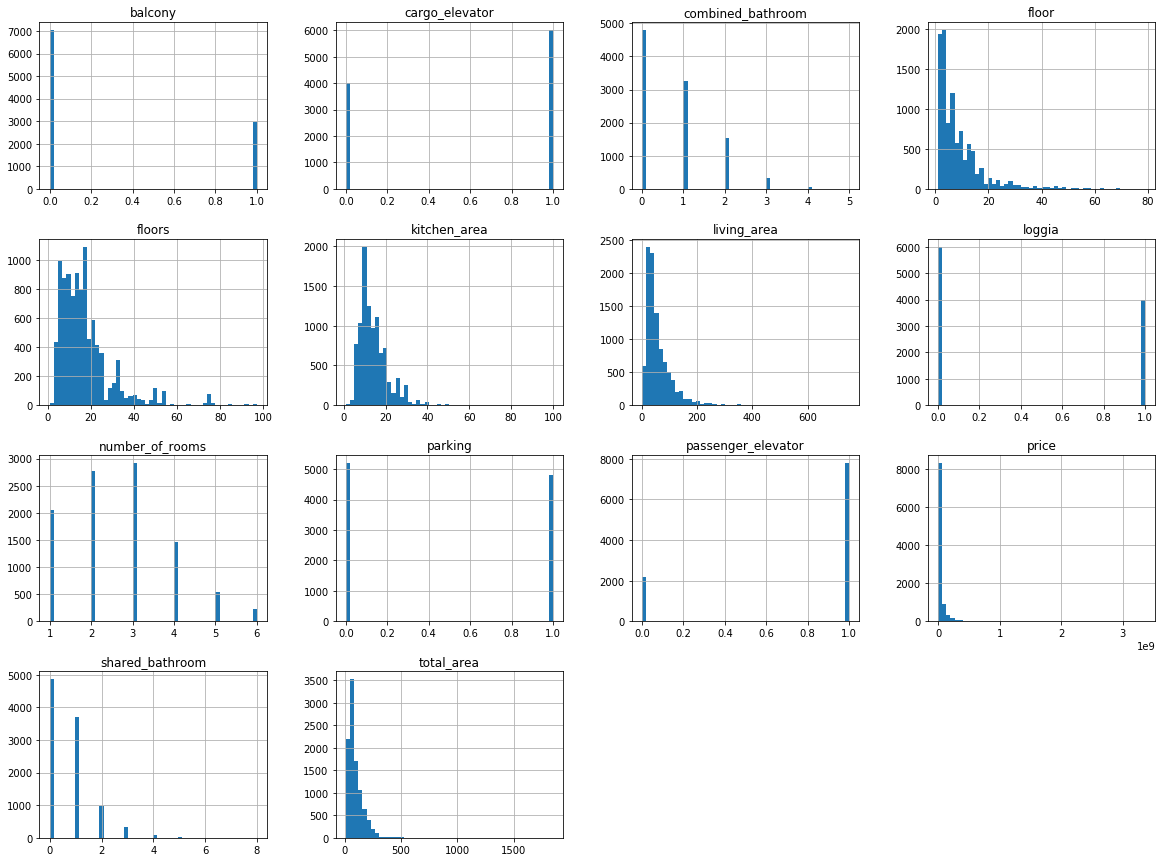

In [156]:
rooms_data.hist(bins=50, figsize=(20,15))
pl.show()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


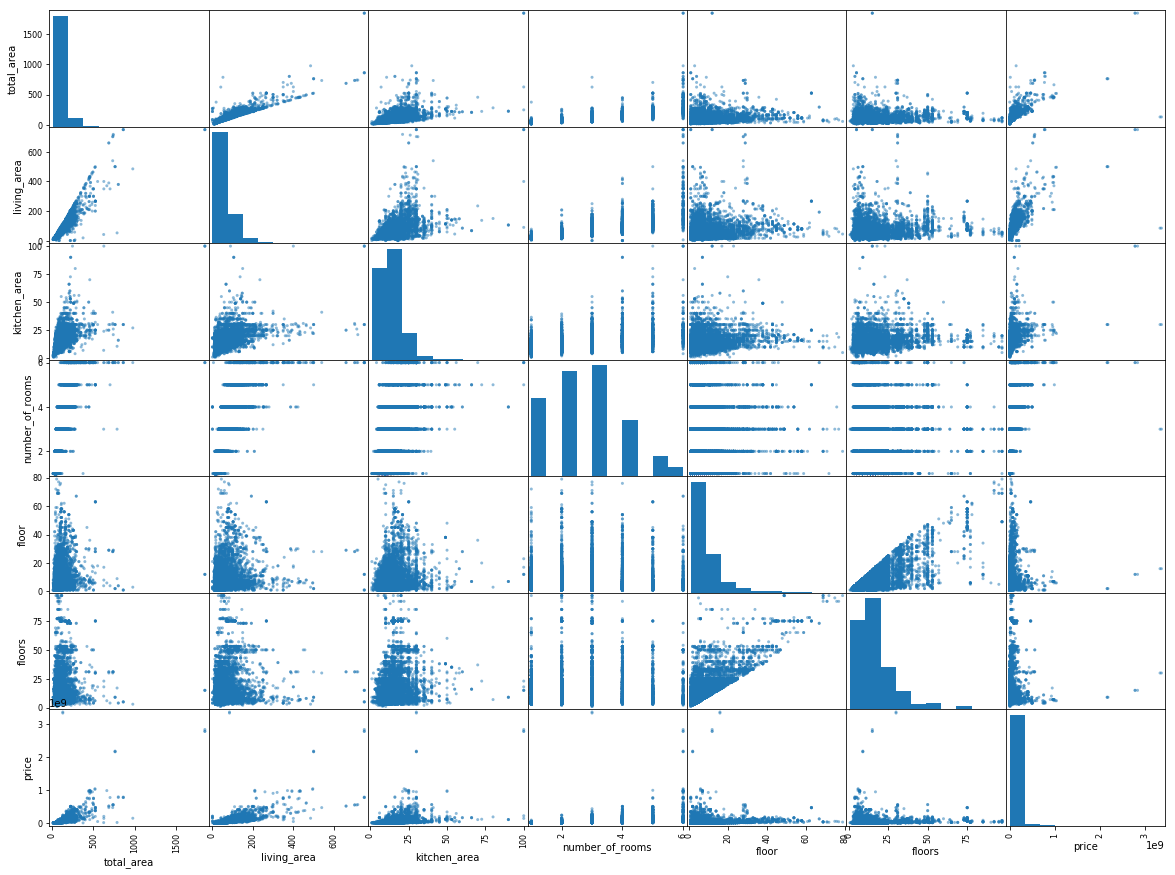

In [157]:
from pandas.tools.plotting import scatter_matrix
attributes = ["total_area",'living_area','kitchen_area','number_of_rooms','floor','floors','price']
m = scatter_matrix(rooms_data[attributes], figsize=(20, 15))

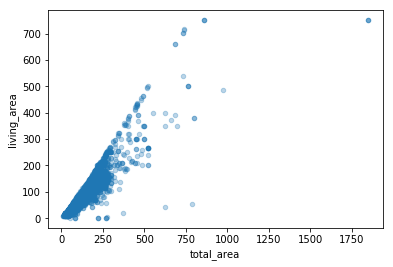

In [158]:
rooms_data.plot(kind="scatter", x="total_area", y="living_area", alpha=0.3)

In [163]:
rooms_data.to_csv('rooms.csv', encoding='cp1251', index=False)

In [164]:
new = pd.read_csv('rooms.csv', encoding='cp1251')
new.head()

,type_of_accommodation,number_of_rooms,floor,floors,type_of_house,repair,combined_bathroom,shared_bathroom,passenger_elevator,cargo_elevator,loggia,parking,balcony,price,total_area,living_area,kitchen_area,year_of_construction,full_adress
0,Новостройка,1,3,15,Монолитный,Нет,0,1,1,1,1,0,0,2857000,23.1,10.0,5.0,2019,"Москва, НАО (Новомосковский), Сосенское поселе..."
1,Вторичка,1,9,11,Монолитный,Нет,1,0,0,0,1,1,0,10900000,49.0,22.0,15.0,2016,"Москва, ВАО, р-н Преображенское, Краснобогатыр..."
2,Вторичка,4,6,11,Монолитный,Нет,2,0,1,1,1,1,0,29200000,118.0,61.0,16.0,2016,"Москва, ВАО, р-н Преображенское, Краснобогатыр..."
3,Вторичка,2,17,17,Панельный,Нет,0,1,1,1,1,1,1,6400000,61.0,31.1,12.0,2016,"Москва, НАО (Новомосковский), Воскресенское по..."
4,Вторичка,3,4,11,Монолитный,Нет,2,0,0,0,1,0,0,26900000,109.0,60.0,15.0,2016,"Москва, ВАО, р-н Преображенское, Краснобогатыр..."
